In [319]:
def cell(x):
    try:
        if x.lower()=="x":
            return " X "
        if x.lower()=="o":
            return " O "
    except:
        pass
    return "   "

In [320]:
def print_state(state):
    sep = "_"*11+"\n"
    ret = []
    n=0
    for row in state:
        ret.append("|".join(map(cell,row)))
        n+=1
        if n<3:
                ret.append(sep)
    for line in ret:
        print(line)

In [321]:
state = (('x','o',0.0),('o','x',0.0),(0.0,'o','x'))
print_state(state)

 X | O |   
___________

 O | X |   
___________

   | O | X 


In [322]:
def has_won(state):
    players = ['x', 'o']
    for i in [0,1]:
        for row in state:
            if row==tuple(players[i]*3): # _
                return i, True
        for cols in [0, 1, 2]:
            if state[0][cols]==state[1][cols] and state[2][cols]==state[0][cols] and state[0][cols]==players[i]: # |
                return i, True
        if state[0][0]==state[1][1] and state[0][0]==state[2][2] and state[0][0]==players[i]:   # \
                return i, True
        if state[2][0]==state[1][1] and state[2][0]==state[0][2] and state[0][2]==players[i]:   # /
                return i, True
            
    return -1, False

In [323]:
has_won(state)

(0, True)

In [259]:
state = (('o','o','o'),('o','x',0.0),(0.33,'o','x'))
print_state(state)
has_won(state)

 O | O | O 
___________

 O | X |   
___________

   | O | X 


(1, True)

In [324]:
state = (('o','x','o'),('o','x',0.0),('o','o','x'))
print_state(state)
has_won(state)

 O | X | O 
___________

 O | X |   
___________

 O | O | X 


(1, True)

In [325]:
state = (('o','x','x'),('o','x',0.0),('x','o','x'))
print_state(state)
has_won(state)

 O | X | X 
___________

 O | X |   
___________

 X | O | X 


(0, True)

In [326]:
state = (('o','x','o'),('o','x',0.0),('x','o','x'))
print_state(state)
has_won(state)

 O | X | O 
___________

 O | X |   
___________

 X | O | X 


(-1, False)

In [327]:
def is_full(state):
    for row in state:
        for v in row:
            if v!="x" and v!="o":
                return False
    return True

In [328]:
is_full((('o','x','o'),('o','x',0.0),('o','o','x')))

False

In [329]:
is_full((('o','x','o'),('o','x','x'),('o','o','x')))

True

In [266]:
class Player:
    def move(state):
        return state
    def learn(self, won):
        pass

In [267]:
def is_valid_move(state, x, y):
    row = state[x]
    if row[y]!="x" and row[y]!="o":
        return True
    return False

In [268]:
def new_state(state, x, y, character):
    l = []
    for row in state:
        l.append(list(row))
    l[x][y] = character
    return (tuple(l[0]), tuple(l[1]), tuple(l[2]))

In [269]:
state = (('o','x','o'),('o','x',0.0),('o','o','x'))
new_state(state, 1, 2, "x")

(('o', 'x', 'o'), ('o', 'x', 'x'), ('o', 'o', 'x'))

In [270]:
class HumanPlayer(Player):
    def __init__(self, character):
        self.character=character
        
    def move(self, state):
        print_state(state)
        flag = False
        while not flag:
            print()
            x = int(input(f"({self.character}) row: "))
            y = int(input(f"({self.character}) col: "))
            flag=is_valid_move(state, x, y)
        print()
        
        return new_state(state, x, y, self.character)

In [ ]:
h = HumanPlayer("x")
print_state(
    h.move((('o','x','o'),
            ('o','x',0.0),
            ('o','o','x')))
)

In [271]:
def do_game(player0, player1, stats, verbose=False):
    state = ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0))
    ended = False
    full = False
    won_won = -1
    
    while not ended and not full:
        state = player0.move(state)
        who_won, ended = has_won(state)
        full = is_full(state)        
        if not ended and not full:
            state = player1.move(state)
            who_won, ended = has_won(state)
            full = is_full(state)
    if ended:
        stats.append("WIN 0" if who_won==0 else "WIN 1")
        player0.learn(1.0 if who_won==0 else 0.0)
        player1.learn(1.0 if who_won==1 else 0.0)
    if full and not ended:
        stats.append("DRAW")    
        player0.learn(0.5)
        player1.learn(0.5)
    if verbose:
        print("DRAW" if full else f"{who} has won!")

stats = []
do_game(HumanPlayer('x'), HumanPlayer('o'), stats, True)

In [272]:
import random

print([random.randrange(3) for x in range(100)])

[2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2, 1, 2]


In [273]:
class RandomPlayer(Player):
    def __init__(self, character):
        self.character=character
        
    def move(self, state):
        flag = False
        while not flag:
            x = random.randrange(3)
            y = random.randrange(3)
            flag=is_valid_move(state, x, y)
       
        return new_state(state, x, y, self.character)

In [39]:
do_game(HumanPlayer('x'), RandomPlayer('o'), stats, True)

   |   |   
___________

   |   |   
___________

   |   |   



(x) row:  1
(x) col:  1



   |   |   
___________

   | X | O 
___________

   |   |   



(x) row:  0
(x) col:  0



 X |   | O 
___________

   | X | O 
___________

   |   |   



(x) row:  2
(x) col:  2



0 has won!


In [274]:
from collections import Counter

stats = []

for i in range(5_000):
    do_game(RandomPlayer('x'), RandomPlayer('o'), stats, False)
    
print(Counter(stats))

Counter({'WIN 0': 2872, 'WIN 1': 1462, 'DRAW': 666})


<Figure size 432x288 with 0 Axes>

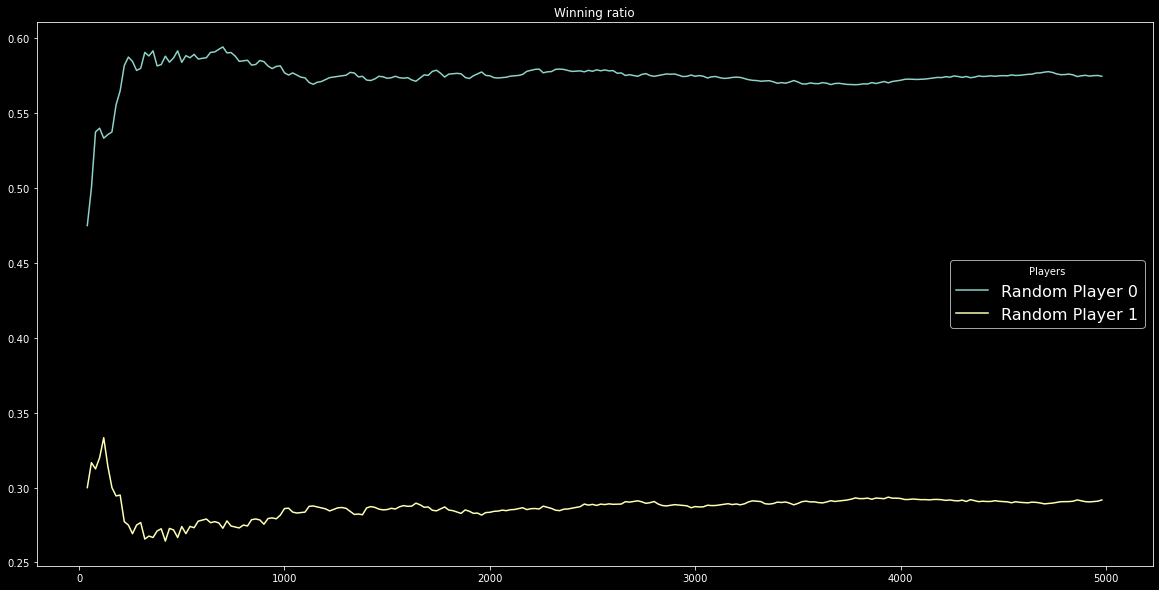

In [309]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")

games = range(40, len(stats), 20)
won0 = [ Counter(stats[:x])['WIN 0']/x for x in games]
won1 = [ Counter(stats[:x])['WIN 1']/x for x in games]


fig = plt.figure();
plt.figure(figsize=(20,10));
plt.title('Winning ratio');
player0, = plt.plot(games, won0, label="Random Player 0");
player1, = plt.plot(games, won1, label="Random Player 1");
plt.legend(handles=[player0, player1], frameon=True, loc="best", title="Players",  fontsize=16);


In [297]:
from random import sample

α = 0.2
β = 0.6
γ = 0.95

class QPlayer(Player):
    def __init__(self, character):
        self.character=character
        self.q_table={}
        self.previous_state=None
        self.current_state=((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0))
        
    def initialize_q_table(self, state):    
        actions = {}   
        for x in range(3):
            for y in range(3):
                if is_valid_move(state, x, y):
                    actions[new_state(state, x, y, self.character)] = β
        self.q_table[state] = actions
        
        return actions
        
    def move(self, state):
        
        ##############################################################
        ## Tworzę powiązanie z ruchem drugiego gracza,              ##
        ## Aby w Q-table był ciągły łańcuch od poprzedniego ruchu   ##
        ##############################################################
        
        if self.previous_state:
            actions = self.q_table.get(self.current_state, {})
            if state not in actions.keys():
                actions[state] = β
                self.q_table[self.current_state] = actions
            
        
        ############################################################
        
        flag = False
        
        ##############################################################
        ## Jeśli w Q-table nie ma akcji powiązanych z obecnym       ##
        ## stanem, dopisuje wszystkie możliwe akcje z wagą β (beta) ##
        ##############################################################
        actions = self.q_table.get(state)
        if not actions:
            actions = self.initialize_q_table(state)

        ##############################################################
        ## Biorę najlepsze Q dla akcji w tym stanie                 ##
        ##############################################################
        best_q = max(actions.values())
        
        ##############################################################
        ## Losuję akcję pośród tych co mają najlepsze Q             ##
        ##############################################################
        best_actions = [ action for action, weight in actions.items() if weight==best_q ]
 
        self.previous_state = state
        self.current_state = sample(best_actions, 1)[0]

        return self.current_state
    
    def learn(self, learned_weight):
        self.q_table[self.previous_state][self.current_state] = learned_weight
        self.previous_state=None
        for state, actions in self.q_table.items():
            for next_move, weight in actions.items():
                next_move_actions = self.q_table.get(next_move)
                if next_move_actions:
                    best_next_q = max(next_move_actions.values())

                    actions[next_move] = (1-α)*weight + γ*α*best_next_q 
                    self.q_table[state] = actions
       

In [298]:
qstats = []
qplayer = QPlayer('o')


In [318]:
from collections import Counter

for i in range(1):
    do_game(RandomPlayer('x'), qplayer, qstats, False)
    
print(Counter(qstats))


Counter({'WIN 1': 620, 'WIN 0': 310, 'DRAW': 79})


In [300]:
from pprint import pprint 
pprint(qplayer.q_table)

{((0.0, 0.0, 0.0), (0.0, 0.0, 'o'), ('x', 'o', 'x')): {(('x', 0.0, 0.0), (0.0, 0.0, 'o'), ('x', 'o', 'x')): 0.594},
 (('x', 0.0, 0.0), (0.0, 0.0, 'o'), ('x', 'o', 'x')): {(('x', 0.0, 0.0), (0.0, 'o', 'o'), ('x', 'o', 'x')): 0.6,
                                                       (('x', 0.0, 0.0), ('o', 0.0, 'o'), ('x', 'o', 'x')): 0.6,
                                                       (('x', 0.0, 'o'), (0.0, 0.0, 'o'), ('x', 'o', 'x')): 0.594,
                                                       (('x', 'o', 0.0), (0.0, 0.0, 'o'), ('x', 'o', 'x')): 0.6},
 ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), ('x', 'o', 'x')): {((0.0, 0.0, 0.0), ('o', 0.0, 0.0), ('x', 'o', 'x')): 0.6,
                                                       ((0.0, 'o', 0.0), (0.0, 0.0, 0.0), ('x', 'o', 'x')): 0.6,
                                                       ((0.0, 0.0, 0.0), (0.0, 0.0, 'o'), ('x', 'o', 'x')): 0.594,
                                                       ((0.0, 0.0, 0.0), (0.0, 'o', 0.0)

In [301]:
from collections import Counter

for i in range(1):
    do_game(RandomPlayer('x'), qplayer, qstats, False)
    
print(Counter(qstats))



Counter({'WIN 0': 2})


In [302]:
from pprint import pprint 
pprint(qplayer.q_table)

{((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 'x', 0.0)): {((0.0, 0.0, 0.0), (0.0, 0.0, 'o'), (0.0, 'x', 0.0)): 0.6,
                                                       ((0.0, 0.0, 'o'), (0.0, 0.0, 0.0), (0.0, 'x', 0.0)): 0.6,
                                                       ((0.0, 0.0, 0.0), ('o', 0.0, 0.0), (0.0, 'x', 0.0)): 0.6,
                                                       ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), ('o', 'x', 0.0)): 0.6,
                                                       (('o', 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 'x', 0.0)): 0.594,
                                                       ((0.0, 'o', 0.0), (0.0, 0.0, 0.0), (0.0, 'x', 0.0)): 0.6,
                                                       ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 'x', 'o')): 0.6,
                                                       ((0.0, 0.0, 0.0), (0.0, 'o', 0.0), (0.0, 'x', 0.0)): 0.6},
 ((0.0, 0.0, 0.0), (0.0, 0.0, 'o'), ('x', 'o', 'x')): {(('x', 0.0, 0.0), (0.0, 0.0, 'o'), ('x

In [303]:
for i in range(5_000):
    do_game(RandomPlayer('x'), qplayer,  qstats, False)
    
print(Counter(qstats))


Counter({'WIN 1': 2823, 'WIN 0': 1775, 'DRAW': 404})


<Figure size 432x288 with 0 Axes>

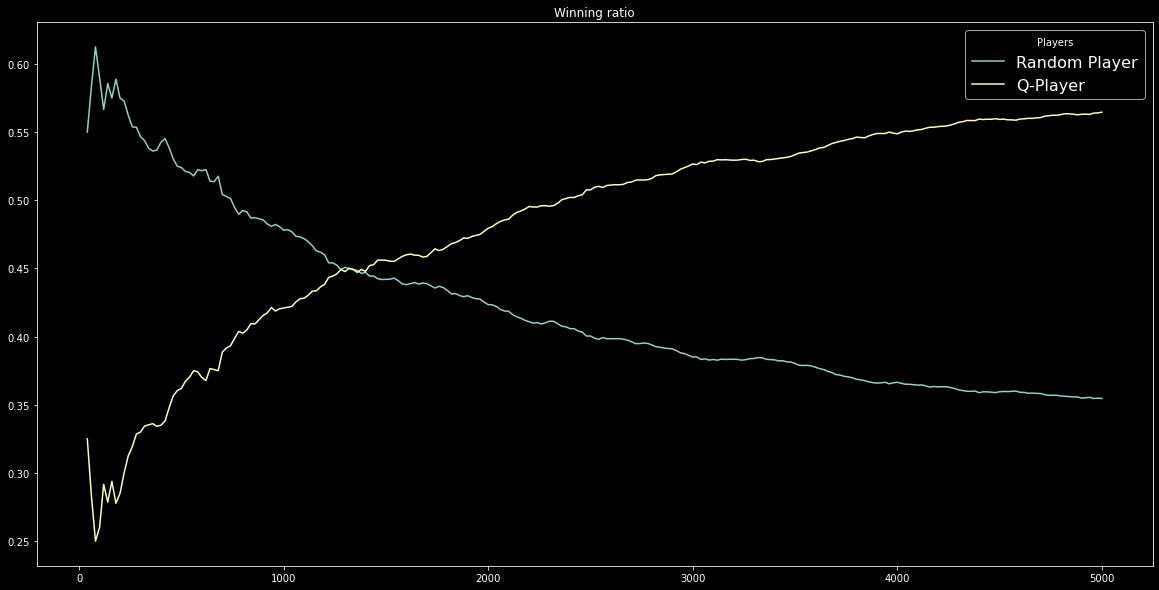

In [304]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")

games = range(40, len(qstats), 20)
won0 = [ Counter(qstats[:x])['WIN 0']/x for x in games]
won1 = [ Counter(qstats[:x])['WIN 1']/x for x in games]


fig = plt.figure();
plt.figure(figsize=(20,10));
player0, = plt.plot(games, won0, label="Random Player");
player1, = plt.plot(games, won1, label="Q-Player");
plt.legend(handles=[player0, player1], frameon=True, loc="best", title="Players",  fontsize=16);
plt.title('Winning ratio');

<Figure size 432x288 with 0 Axes>

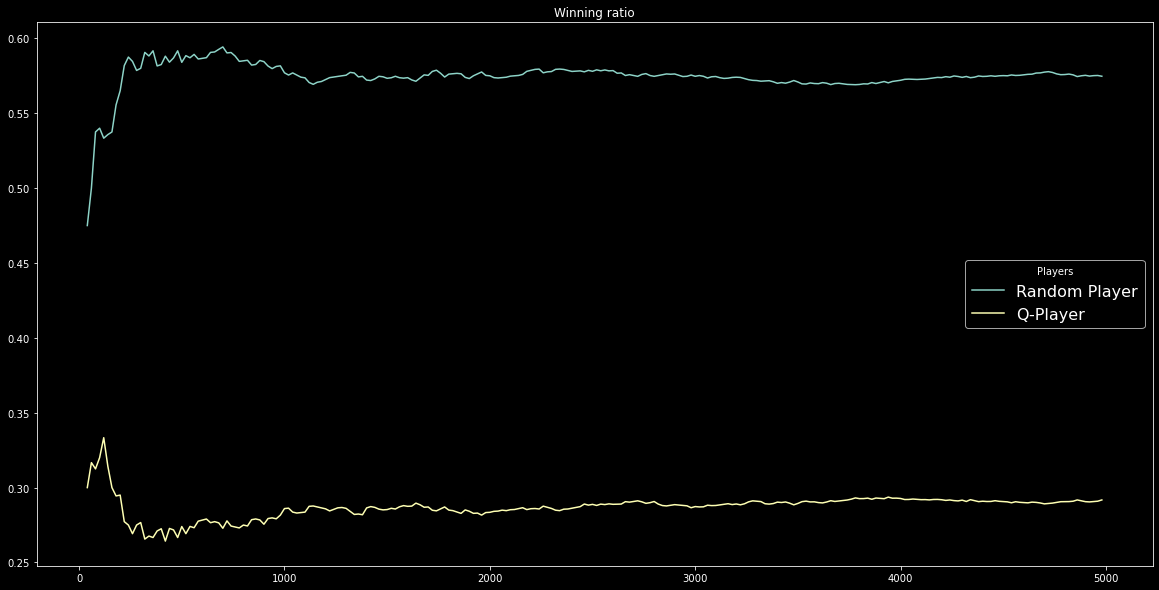

In [305]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")

games = range(40, len(stats), 20)
won0 = [ Counter(stats[:x])['WIN 0']/x for x in games]
won1 = [ Counter(stats[:x])['WIN 1']/x for x in games]


fig = plt.figure();
plt.figure(figsize=(20,10));
player0, = plt.plot(games, won0, label="Random Player");
player1, = plt.plot(games, won1, label="Q-Player");
plt.legend(handles=[player0, player1], frameon=True, loc="best", title="Players",  fontsize=16);
plt.title('Winning ratio');

In [306]:
qstats = []
for i in range(1_000):
    do_game(RandomPlayer('x'), qplayer,  qstats, False)
    
print(Counter(qstats))

Counter({'WIN 1': 616, 'WIN 0': 305, 'DRAW': 79})


<Figure size 432x288 with 0 Axes>

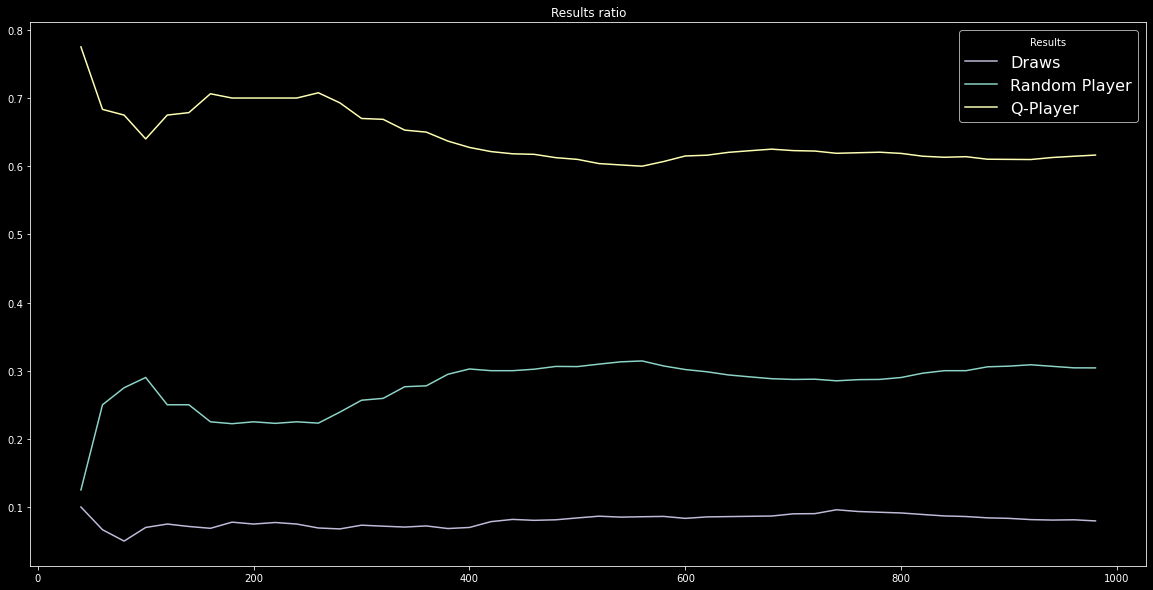

In [307]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")

games = range(40, len(qstats), 20)
won0 = [ Counter(qstats[:x])['WIN 0']/x for x in games]
won1 = [ Counter(qstats[:x])['WIN 1']/x for x in games]
draw = [ Counter(qstats[:x])['DRAW']/x for x in games]


fig = plt.figure();
plt.figure(figsize=(20,10));
player0, = plt.plot(games, won0, label="Random Player");
player1, = plt.plot(games, won1, label="Q-Player");
draws, = plt.plot(games, draw, label="Draws");
plt.legend(handles=[draws, player0, player1], frameon=True, loc="best", title="Results",  fontsize=16);
plt.title('Results ratio');

In [296]:
do_game(HumanPlayer('x'), qplayer,  [], True)

   |   |   
___________

   |   |   
___________

   |   |   



(x) row:  1
(x) col:  1



 O |   |   
___________

   | X |   
___________

   |   |   



(x) row:  2
(x) col:  0



 O |   | O 
___________

   | X |   
___________

 X |   |   



(x) row:  0
(x) col:  1



 O | X | O 
___________

   | X |   
___________

 X | O |   



(x) row:  1
(x) col:  0



 O | X | O 
___________

 X | X | O 
___________

 X | O |   



(x) row:  2
(x) col:  2



DRAW
